# Activity 10 - Text Analytics

This notebook illustrates text analytics for examining wikipedia articles and for examining movie dialogues.


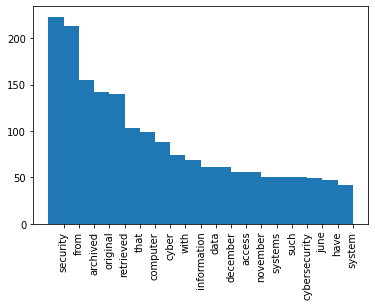

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import urllib.request

### Open the web page and save this to a text file
file_name = './wikipedia.txt'
url = "https://en.wikipedia.org/wiki/Computer_security"

with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    data = response.read()
    out_file.write(data)
    
### Open the text file using Beautiful Soup to parse the HTML
with open(file_name, encoding="utf8") as fp:
    soup = BeautifulSoup(fp, 'html.parser')
    
### Extract the text from the HTML and split based on spaces
text = soup.text
text = text.split(" ")
### For each word, if length is greater than 3
### then set to lowercase and append to our final text list
text_final = []
for t in text:
    if len(t) > 3:
        t = t.lower()
        text_final.append(t)
 
### Count the number of occurrences for each word
from collections import Counter
count = Counter(text_final)

### Split into labels and values for our chart
labels, values = zip(*count.most_common(20))
indexes = np.arange(len(labels))
width = 1

### Plot chart
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels, rotation=90)
plt.show()


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import urllib.request
### Open the web page and save this to a text file
file_name = 'wikipedia.txt'
url = "https://en.wikipedia.org/wiki/Computer_security"
with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    data = response.read()
    out_file.write(data)
### Open the text file using Beautiful Soup to parse the HTML
with open(file_name, encoding="utf8") as fp:
    soup = BeautifulSoup(fp, 'html.parser')
### Extract the text from the HTML and split based on spaces
text = soup.text
text = text.split(" ")
### For each word, if length is greater than 3
### then set to lowercase and append to our final text list
text_final = []
for t in text:
    if len(t) > 3:
        t = t.lower()
        text_final.append(t)
dictionary_list = ['security', 'attack', 'data', 'encryption', 'cyber','crime']
dictionary_counts = {}
for t in text_final:
    if t in dictionary_list:
        if t not in dictionary_counts:
            dictionary_counts[t] = 0
            dictionary_counts[t] += 1
 
dictionary_counts

{'security': 1,
 'data': 1,
 'cyber': 1,
 'attack': 1,
 'encryption': 1,
 'crime': 1}

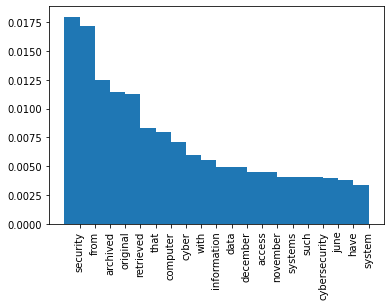

In [19]:
 ### Let us now calculate this as a probability - rather than a count.
len(text_final)
count = Counter(text_final)
for c in count:
    count[c] = count[c] / len(text_final)
count
### Split into labels and values for our chart
labels, values = zip(*count.most_common(20))
indexes = np.arange(len(labels))
width = 1
### Plot chart
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels, rotation=90)
plt.show()


In [20]:
for d in dictionary_counts:
    dictionary_counts[d] = dictionary_counts[d] / len(text_final)
dictionary_counts

{'security': 8.05607024893257e-05,
 'data': 8.05607024893257e-05,
 'cyber': 8.05607024893257e-05,
 'attack': 8.05607024893257e-05,
 'encryption': 8.05607024893257e-05,
 'crime': 8.05607024893257e-05}

This shows a simple case where we have a small (5 element) dictionary. Suppose we had more sophisiticated
dictionaries - positive and negative words, or words for particular classes - then we can do much more analysis
using these simple techniques

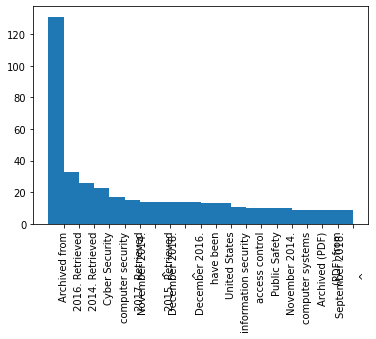

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import urllib.request
### Open the web page and save this to a text file
file_name = 'wikipedia.txt'
url = "https://en.wikipedia.org/wiki/Computer_security"
with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    data = response.read()
    out_file.write(data)
### Open the text file using Beautiful Soup to parse the HTML
with open(file_name, encoding="utf8") as fp:
    soup = BeautifulSoup(fp, 'html.parser')
### Extract the text from the HTML and split based on spaces
text = soup.text
text = text.split(" ")
### For each word, if length is greater than 3
### then set to lowercase and append to our final text list
text_final = []
for t in range(len(text) - 1):
    if len(text[t]) > 3 and len(text[t+1]) > 3:
        text_final.append(text[t] + " " + text[t+1])
 
### Count the number of occurrences for each word
from collections import Counter
count = Counter(text_final)
### Split into labels and values for our chart
labels, values = zip(*count.most_common(20))
indexes = np.arange(len(labels))
width = 1
### Plot chart
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels, rotation=90)
plt.show()

In [22]:
### Here are the imports that you will require
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
def load_data():
    # the data is a standard pcap packet capture file (saved as a csv output)
    file_name = './data/movie_lines.txt'
    # this will then put the csv data into a pandas dataframe
    #data = pd.read_csv(file_name, sep='+++$+++')
    lines = []
    with open(file_name, 'r', encoding='utf-8', errors="replace") as f:
        for line in f:
            line = line.split(" +++$+++ ")
            line[4] = line[4].split('\n')[0]
            lines.append(line)
    data = pd.DataFrame.from_records(lines, columns=['ID1', 'ID2', 'ID3', 'ID4', 'Text'])
    return data


In [23]:
data = load_data()
data


,ID1,ID2,ID3,ID4,Text
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.
...,...,...,...,...,...
304708,L666371,u9030,m616,DURNFORD,Lord Chelmsford seems to want me to stay back ...
304709,L666370,u9034,m616,VEREKER,I'm to take the Sikali with the main column to...
304710,L666369,u9030,m616,DURNFORD,"Your orders, Mr Vereker?"
304711,L666257,u9030,m616,DURNFORD,"Good ones, yes, Mr Vereker. Gentlemen who can ..."


In [24]:
unique_characters = data['ID4'].unique()
print (unique_characters.tolist())
print ("Number of characters: ", len(unique_characters))

['BIANCA', 'CAMERON', 'CHASTITY', 'JOEY', 'KAT', 'WALTER', 'BRUCE', 'PATRICK', 'MICHAEL', 'MANDELLA', 'MISS PERKY', 'SHARON', 'ALONSO', 'SAILOR', 'AROJAZ', 'COLUMBUS', 'SANCHEZ', 'BEATRIX', 'BOBADILLA', 'FERNANDO', 'UTAPAN', 'MARCHENA', 'ISABEL', 'MOXICA', 'MENDEZ', 'PINZON', 'CUTLER', 'EMIL', 'JORDY', 'DAPHNE', 'EDDIE', 'DUFFY', 'KORFIN', 'LEON', 'ROSE', 'NICOLETTE', 'HAWKINS', 'SECONDARY OFFICER', 'HONEY', 'IMMIGRATION OFFICER', 'VENDOR', 'OLEG', 'MILOS', 'MAGGIE', 'MUGGER', 'MAX', 'TOMMY', 'STEPHEN GELLER', 'ROBERT HAWKINS', 'FLOYD', 'B20', 'BOWMAN', 'POOLE', 'HAL', 'C12', 'CHILD', 'PILOT', 'CO-PILOT', 'ELENA', 'MILLER', 'SMYSLOV', 'MICHAELS', 'LUTHER', 'ATTENDANT', 'HAMMOND', 'BARTENDER', 'GANZ', 'BILLY', 'CANDY', 'CASEY', 'CATES', 'HADEN', 'YOUNG COP', 'KEHOE', 'ELAINE', 'LISA', 'HENRY', 'SOSNA', 'CORNELIUS', 'LEELOO', 'ZORG', 'KORBEN', 'PRESIDENT', 'DAVID', 'DIVA', 'FINGER', 'GIRL', 'PRIEST', 'KOMMANDER', 'MOTHER', 'VOICE', 'LOC RHOD', 'MUNRO', 'THAI', 'MACTILBURGH', 'STAEDERT', 

We now need to get the dictionary of words that are spoken by all characters. We will make use of the Natural
Language Toolkit for tokenising our sentences. This can take some time to compute as this dictionary will be
quite long.


In [26]:
import nltk
nltk.download('punkt')

dictionary = []
for row in range(data.shape[0]):
    line = data.iloc[row]['Text']
    tokens = nltk.word_tokenize(line)
    for t in tokens:
        # let's set t > 2 so that we remove stopwords and things like I, we, he, of, etc.
        if t not in dictionary and len(t) > 2:
            dictionary.append(t)


[nltk_data] Downloading package punkt to C:\Users\pa-
[nltk_data]     legg\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [16]:
len(dictionary)

0

Our dictionary contains 73925 words that appear in the movie dialog dataset. We now create a Numpy matrix
that is 73925 by 304713, that will hold our relation data. For each row of the data, we get the text, and now we
flag whether or not a word appears in the sentence, using our matrix.

In [ ]:
matrix = np.zeros([len(dictionary), data.shape[0]])
for row in range(data.shape[0]):
 line = data.iloc[row]['Text']
 tokens = nltk.word_tokenize(line)
 for t in tokens:
 if len(t) > 2:
 index = dictionary.index(t)
 matrix[index, row] = 1

In [ ]:
### We can inspect text that a particular user has said
data[data['ID4'] == 'MR. POTATO HEAD']


In [ ]:
### We can find all sentences that contain the keyword 'cake', and find
 related keywords
keyword = 'cake'
i = dictionary.index(keyword)
cols = np.where(matrix[i, :] == 1)[0]
from collections import Counter
related_words = []
for c in range(len(cols)):
 text = data.iloc[cols[c]]['Text']
 tokens = nltk.word_tokenize(text)
 for t in tokens:
 if len(t) > 2:
 related_words.append(t)
 
count = Counter(related_words).most_common(20)
count

Here we see that if we search the term cake, then we can find related words such as piece and birthday.
Let's try another example where we now group all text based on user, to identify which user is most likely to
have said our search term.

In [ ]:
import nltk
unique_characters = data['ID4'].unique().tolist()
user_matrix = np.zeros([len(dictionary), len(unique_characters)])
for row in range(data.shape[0]):
 line = data.iloc[row]['Text']
 user = data.iloc[row]['ID4']
 user_id = unique_characters.index(user)
 tokens = nltk.word_tokenize(line)
 for t in tokens:
 if len(t) > 2:
 index = dictionary.index(t)
 user_matrix[index, user_id] += 1

In [ ]:
user_matrix

In [ ]:
### Given a keyword, we can find who is the most likely to have said thi
s
keyword = 'Woody'
i = dictionary.index(keyword)
cols = np.where(user_matrix[i, :] > 0)[0]
for c in range(len(cols)):
 print (unique_characters[cols[c]] + " : " + str(user_matrix[i, cols[
c]]))


In [ ]:
### Given two keywords, we can find who is the most likely to have said
 this
keywords = ['Woody', 'lunchbox']
indexes = []
cols = []
for k in keywords:
 i = dictionary.index(k)
 cols.append(np.where(user_matrix[i, :] > 0)[0])
 
print (cols)
final_cols = []
for i in cols[0]:
 if i in cols[1]:
 final_cols.append(i)
for c in range(len(final_cols)):
 print (unique_characters[final_cols[c]])
